In [1]:
# install fastkaggle if not available
try: import fastkaggle
except ModuleNotFoundError:
    !pip install -Uq fastkaggle

from fastkaggle import *

## Getting set up

In [2]:
comp = 'playground-series-s3e26'
path = setup_comp(comp, install='')

100%|███████████████████████████████████████████████████████| 350k/350k [00:00<00:00, 811kB/s]

In [3]:
path

Path('playground-series-s3e26')

In [4]:
trn_path = path/'train.csv'

In [5]:
import pandas as pd
df = pd.read_csv(trn_path)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [7]:
df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [8]:
df.tail()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D
7904,7904,1978,D-penicillamine,19237,F,N,N,N,N,0.7,256.0,3.23,22.0,645.0,74.40,85.0,336.0,10.3,3.0,C


In [13]:
df.isna().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [19]:
df.nunique()

id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

In [27]:
df.Status.value_counts()

Status
C     4965
D     2665
CL     275
Name: count, dtype: int64

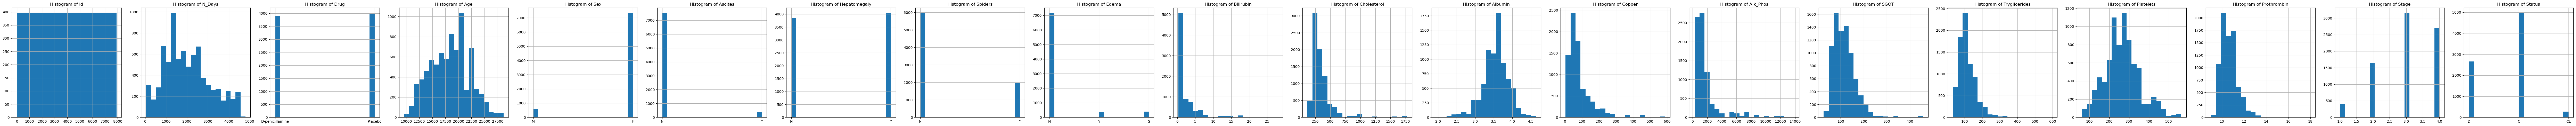

In [25]:
import matplotlib.pyplot as plt

n_rows = 1
n_cols = df.shape[1]

plt.figure(figsize=(5 * n_cols, 5 * n_rows))

for i, column in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    df[column].hist(bins=20)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

In [61]:
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingClassifier
from sklearn.metrics import make_scorer, mean_absolute_error, classification_report, log_loss
from scipy.stats import loguniform

In [62]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]
X_tr, X_dev, y_tr, y_dev = train_test_split(X,y,test_size=0.2, stratify=y) # XXyy

In [63]:
X_tr.shape, y_tr.shape, X_dev.shape, y_dev.shape

((6324, 18), (6324,), (1581, 18), (1581,))

In [65]:
y_tr.value_counts(), y_dev.value_counts()

(Status
 C     3972
 D     2132
 CL     220
 Name: count, dtype: int64,
 Status
 C     993
 D     533
 CL     55
 Name: count, dtype: int64)

In [67]:
ct = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include = np.number)),
    (OneHotEncoder(), make_column_selector(dtype_include=object)), 
    remainder = 'drop'
)

pipe = make_pipeline(ct, HistGradientBoostingClassifier())

pipe.fit(X_tr, y_tr)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f28f87875e0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f28f8785cf0>)])),
                ('histgradientboostingclassifier',
                 HistGradientBoostingClassifier())])

In [68]:
y_pred = pipe.predict(X_dev)
print(classification_report(y_dev,y_pred))

              precision    recall  f1-score   support

           C       0.84      0.92      0.88       993
          CL       0.38      0.09      0.15        55
           D       0.80      0.73      0.77       533

    accuracy                           0.83      1581
   macro avg       0.68      0.58      0.60      1581
weighted avg       0.81      0.83      0.82      1581



In [69]:
y_pred_proba = pipe.predict_proba(X_dev)
log_loss(y_dev, y_pred_proba)

0.48973167371287585

## Submitting to Kaggle

In [70]:
ss = pd.read_csv(path/'sample_submission.csv')
ss

,id,Status_C,Status_CL,Status_D
0,7905,0.628084,0.034788,0.337128
1,7906,0.628084,0.034788,0.337128
2,7907,0.628084,0.034788,0.337128
3,7908,0.628084,0.034788,0.337128
4,7909,0.628084,0.034788,0.337128
...,...,...,...,...
5266,13171,0.628084,0.034788,0.337128
5267,13172,0.628084,0.034788,0.337128
5268,13173,0.628084,0.034788,0.337128
5269,13174,0.628084,0.034788,0.337128


In [72]:
tst = pd.read_csv(path/'test.csv')
tst.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [73]:
tst_pred = pipe.predict_proba(tst.iloc[:,1:])

In [74]:
ss.iloc[:,1:] = tst_pred

In [75]:
ss

,id,Status_C,Status_CL,Status_D
0,7905,0.434725,0.003112,0.562163
1,7906,0.512765,0.143377,0.343858
2,7907,0.001679,0.000063,0.998258
3,7908,0.991483,0.000798,0.007719
4,7909,0.920141,0.019671,0.060188
...,...,...,...,...
5266,13171,0.908594,0.056127,0.035279
5267,13172,0.990721,0.000052,0.009227
5268,13173,0.883950,0.001097,0.114953
5269,13174,0.996798,0.000940,0.002263


In [76]:
ss.to_csv('subm.csv', index=False)
!head subm.csv

id,Status_C,Status_CL,Status_D
7905,0.4347249499214946,0.00311226689982654,0.5621627831786788
7906,0.5127647227617481,0.1433771909255574,0.3438580863126944
7907,0.0016786905533738806,6.302847204493892e-05,0.9982582809745812
7908,0.9914831945093387,0.0007981485006693488,0.007718656989991857
7909,0.9201409536704142,0.019671033500215266,0.06018801282937061
7910,0.9985132737244475,4.2791124609069175e-05,0.001443935150943341
7911,0.9965751784094825,3.883307311199043e-05,0.0033859885174054817
7912,0.04885561339460368,0.006118347401206451,0.9450260392041898
7913,0.0019606168214738,1.039421258195091e-05,0.9980289889659442


In [77]:
if not iskaggle:
    from kaggle import api
    api.competition_submit_cli('subm.csv', 'starter HistGBC', comp)

100%|███████████████████████████████████████████████████████| 342k/342k [00:00<00:00, 380kB/s]


## Conclusion

## Addendum

In [26]:
if not iskaggle:
    push_notebook('xy', 'histgbr-minmax-transform',
                  title='Minmax transform and HistGBR model',
                  file='01-histgbr-minmax-transform.ipynb',
                  competition=comp, private=False, gpu=False)

Your kernel title does not resolve to the specified id. This may result in surprising behavior. We suggest making your title something that resolves to the specified id. See https://en.wikipedia.org/wiki/Clean_URL#Slug for more information on how slugs are determined.
Kernel version 1 successfully pushed.  Please check progress at https://www.kaggle.com/code/xiaochuanyang/minmax-transform-and-histgbr-model
